# Task L4

**Description**: Exploratory Data Analysis (EDA) of car insurance dataset.

**Dataset description:** Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.

### 1. Import necessary libraries

In [476]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 2. Reading DataFrame

In [477]:
carIC = pd.read_csv("Car_Insurance_Claim.csv")
carIC.head(10)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
5,5,877557,40-64,female,majority,20-29y,high school,upper class,0.6191273725847388,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,6,930134,65+,male,majority,30y+,high school,upper class,0.4929435502195342,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,7,461006,26-39,female,majority,0-9y,university,working class,0.468689297434465,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,8,68366,40-64,female,majority,20-29y,university,working class,0.5218149362971065,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,9,445911,40-64,female,majority,0-9y,NaN,upper class,0.5615310319383646,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


### 3. Data cleaning

- Remove unnecessary columns. In my opinion, these columns do not affect driving. Now the NaN normalization data for one was the median for another most often the value

In [478]:
carIC = carIC.drop(['Unnamed: 0', 'ID', 'RACE', 'EDUCATION', 'POSTAL_CODE'], axis=1)
carIC.head(10)

,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,0-9y,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,0-9y,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,0-9y,working class,0.2060128507324556,1.0,before 2015,0.0,none,11000.0,sedan,0,0,0,0.0
4,26-39,male,10-19y,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0
5,40-64,female,20-29y,upper class,0.6191273725847388,1.0,after 2015,0.0,1.0,13000.0,sedan,3,0,3,0.0
6,65+,male,30y+,upper class,0.4929435502195342,0.0,after 2015,1.0,1.0,13000.0,sedan,7,0,3,0.0
7,26-39,female,0-9y,working class,0.468689297434465,0.0,after 2015,0.0,1.0,14000.0,sedan,0,0,0,1.0
8,40-64,female,20-29y,working class,0.5218149362971065,0.0,before 2015,1.0,0.0,13000.0,sedan,0,0,0,0.0
9,40-64,female,0-9y,upper class,0.5615310319383646,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,1.0


- Convert the string columns to numeric and normalization of values. Also check how many missing values are found in the columns

In [479]:
numeric_cols = ["CREDIT_SCORE", "VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN",
                "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]

carIC[numeric_cols] = carIC[numeric_cols].replace("none", np.nan) # Replace none with NaN

for col in numeric_cols:
    carIC[col] = pd.to_numeric(carIC[col], errors='coerce')

carIC[numeric_cols].isna().sum()

CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
MARRIED                  98
CHILDREN                100
ANNUAL_MILEAGE         1050
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

- Check how many remaining missing values are found in the columns

In [480]:
carIC["CREDIT_SCORE"] = carIC["CREDIT_SCORE"].fillna(carIC["CREDIT_SCORE"].median())
carIC["VEHICLE_OWNERSHIP"] = carIC["VEHICLE_OWNERSHIP"].fillna(0)
carIC["ANNUAL_MILEAGE"] = carIC["ANNUAL_MILEAGE"].fillna(carIC["ANNUAL_MILEAGE"].median())
carIC["MARRIED"] = carIC["MARRIED"].fillna(0)
carIC["CHILDREN"] = carIC["CHILDREN"].fillna(0)
carIC["SPEEDING_VIOLATIONS"] = carIC["SPEEDING_VIOLATIONS"].fillna(0)
carIC["DUIS"] = carIC["DUIS"].fillna(0)
carIC["PAST_ACCIDENTS"] = carIC["PAST_ACCIDENTS"].fillna(0)
carIC["OUTCOME"] = carIC["OUTCOME"].fillna(0)

carIC[numeric_cols].isna().sum()

CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

- Check how many missing values are found in the columns

In [481]:
columns_to_fill = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR']

carIC[columns_to_fill] = carIC[columns_to_fill].replace("none", np.nan) # Replace none with NaN

carIC[columns_to_fill].isna().sum()

AGE                   100
GENDER                 99
DRIVING_EXPERIENCE    100
INCOME                  0
VEHICLE_YEAR          100
dtype: int64

- Check how many remaining missing values are found in the columns

In [482]:
for column in columns_to_fill:
    most_frequent_value = carIC[column].mode()[0] # Find the most frequent value
    carIC[column] = carIC[column].fillna(most_frequent_value) # Fill missing values with the most frequent value

carIC[columns_to_fill].isna().sum()

AGE                   0
GENDER                0
DRIVING_EXPERIENCE    0
INCOME                0
VEHICLE_YEAR          0
dtype: int64

### 4. Descriptive statistics

- Average value

In [483]:
mean_values = carIC.mean(numeric_only=True)
mean_values

CREDIT_SCORE               0.51679
VEHICLE_OWNERSHIP          0.69070
MARRIED                    0.49300
CHILDREN                   0.68150
ANNUAL_MILEAGE         11730.10000
SPEEDING_VIOLATIONS        1.46710
DUIS                       0.23650
PAST_ACCIDENTS             1.04680
OUTCOME                    0.31050
dtype: float64

- Median

In [484]:
median_values = carIC.median(numeric_only=True)
median_values

CREDIT_SCORE               0.524905
VEHICLE_OWNERSHIP          1.000000
MARRIED                    0.000000
CHILDREN                   1.000000
ANNUAL_MILEAGE         12000.000000
SPEEDING_VIOLATIONS        0.000000
DUIS                       0.000000
PAST_ACCIDENTS             0.000000
OUTCOME                    0.000000
dtype: float64

- Mode

In [485]:
mode_values = carIC.mode().iloc[0]
mode_values

AGE                          26-39
GENDER                      female
DRIVING_EXPERIENCE            0-9y
INCOME                 upper class
CREDIT_SCORE              0.524905
VEHICLE_OWNERSHIP              1.0
VEHICLE_YEAR           before 2015
MARRIED                        0.0
CHILDREN                       1.0
ANNUAL_MILEAGE             12000.0
VEHICLE_TYPE                 sedan
SPEEDING_VIOLATIONS            0.0
DUIS                           0.0
PAST_ACCIDENTS                 0.0
OUTCOME                        0.0
Name: 0, dtype: object

- Min, Max

In [486]:
min_values = carIC.min(numeric_only=True)
max_values = carIC.max(numeric_only=True)
print("Min\n", min_values)
print("\nMax\n", max_values)

Min
 CREDIT_SCORE              0.053358
VEHICLE_OWNERSHIP         0.000000
MARRIED                   0.000000
CHILDREN                  0.000000
ANNUAL_MILEAGE         2000.000000
SPEEDING_VIOLATIONS       0.000000
DUIS                      0.000000
PAST_ACCIDENTS            0.000000
OUTCOME                   0.000000
dtype: float64

Max
 CREDIT_SCORE               0.960819
VEHICLE_OWNERSHIP          1.000000
MARRIED                    1.000000
CHILDREN                   1.000000
ANNUAL_MILEAGE         22000.000000
SPEEDING_VIOLATIONS       22.000000
DUIS                       6.000000
PAST_ACCIDENTS            15.000000
OUTCOME                    1.000000
dtype: float64


- Unique values

In [487]:
unique_values = carIC.nunique()
unique_values

AGE                       4
GENDER                    2
DRIVING_EXPERIENCE        4
INCOME                    4
CREDIT_SCORE           8929
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   2
CHILDREN                  2
ANNUAL_MILEAGE           21
VEHICLE_TYPE              3
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

- Groupby analysis for example column 'GENDER' how Median

In [488]:
grouped_median = carIC.groupby('GENDER').median(numeric_only=True)
grouped_median

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
GENDER,,,,,,,,,
female,0.524905,1.0,0.0,1.0,12000.0,0.0,0.0,0.0,0.0
male,0.524905,1.0,0.0,1.0,12000.0,1.0,0.0,1.0,0.0


### 5. Data visualization

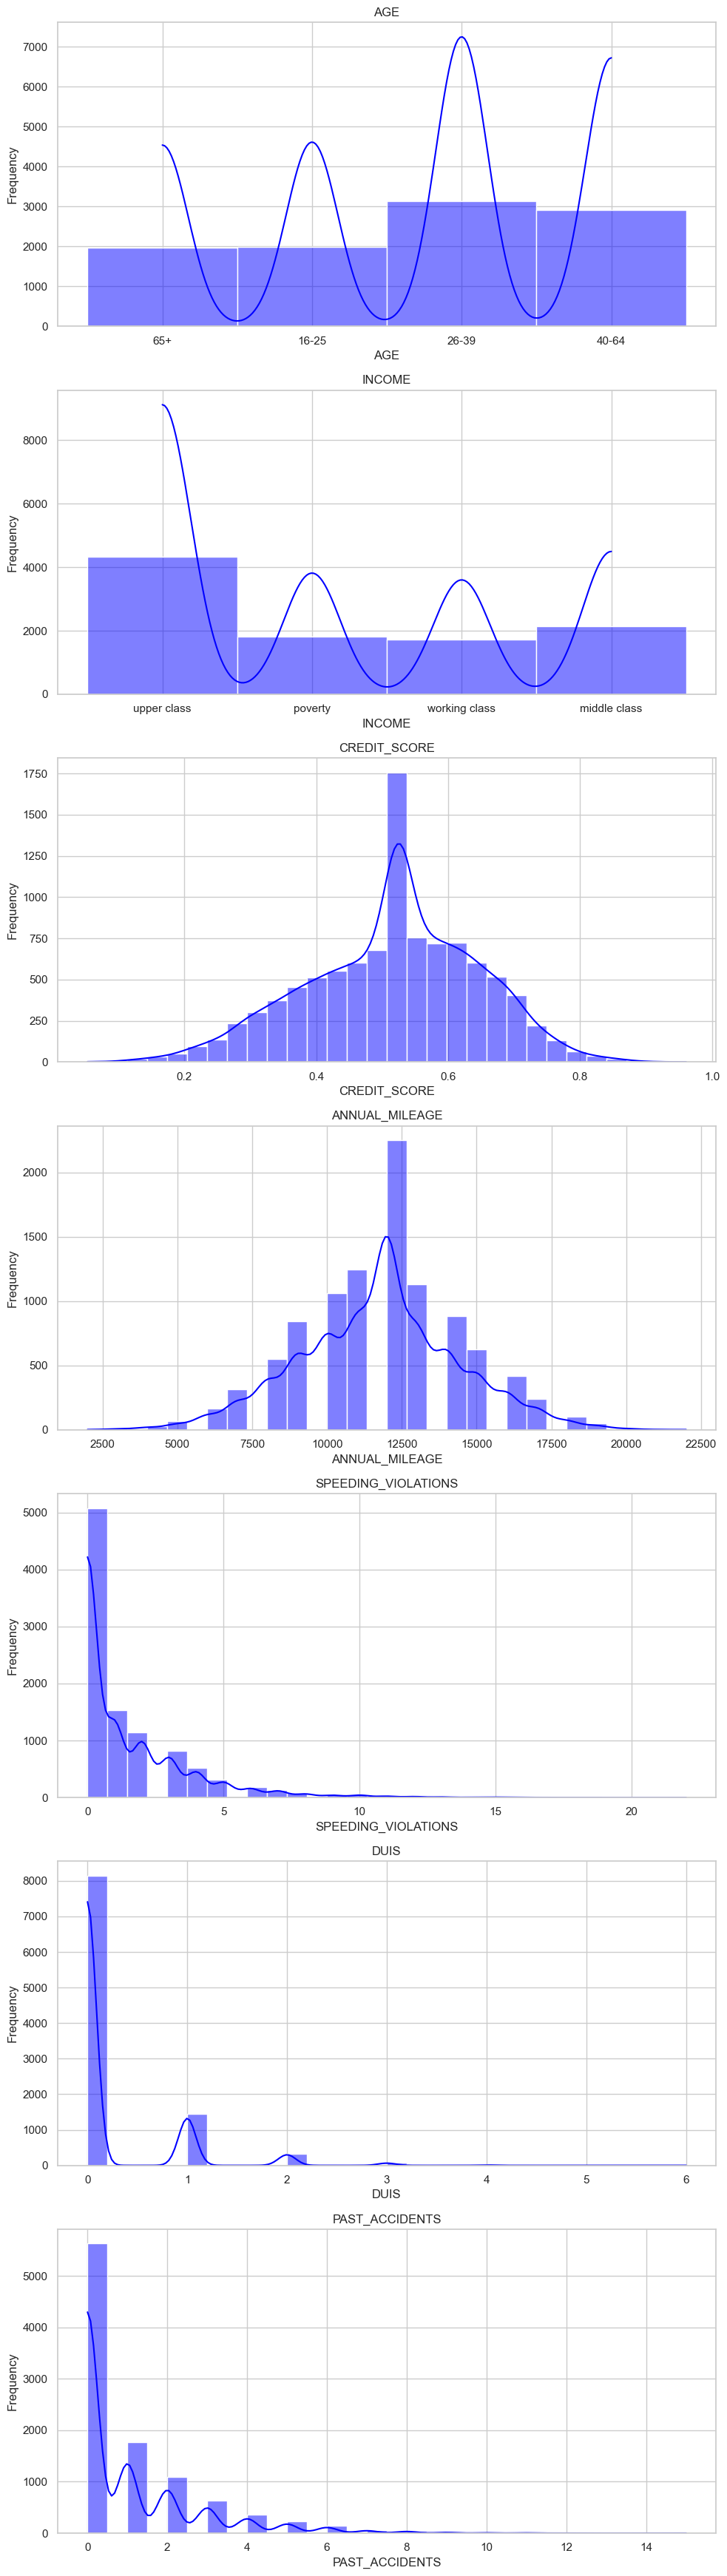

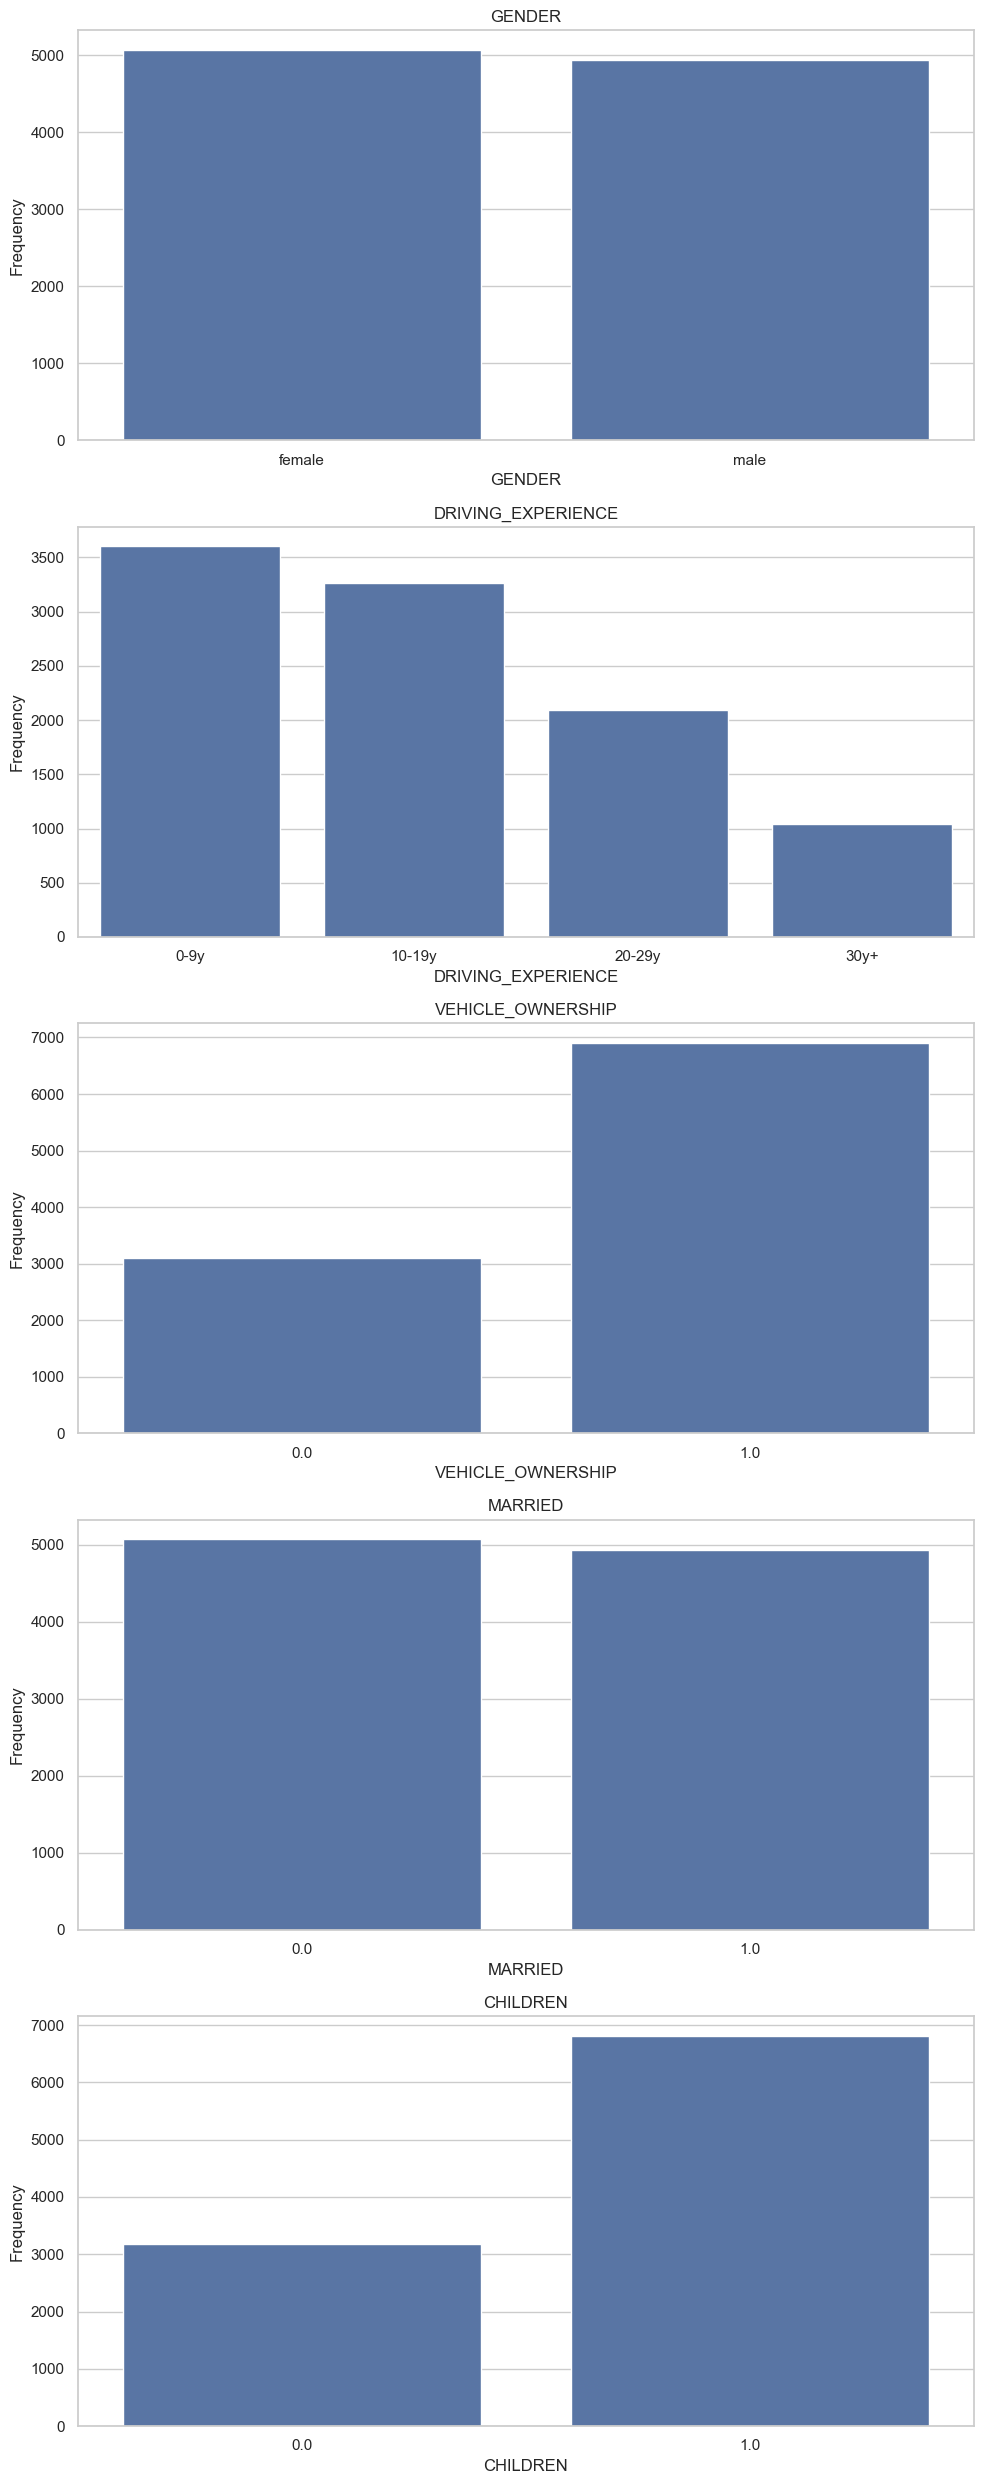

In [504]:
numerical_columns = ['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(carIC[column], kde=True, bins=30, color='blue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

categorical_columns = ['GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']

plt.figure(figsize=(10, len(categorical_columns) * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=carIC, x=column, hue=None, legend=False)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

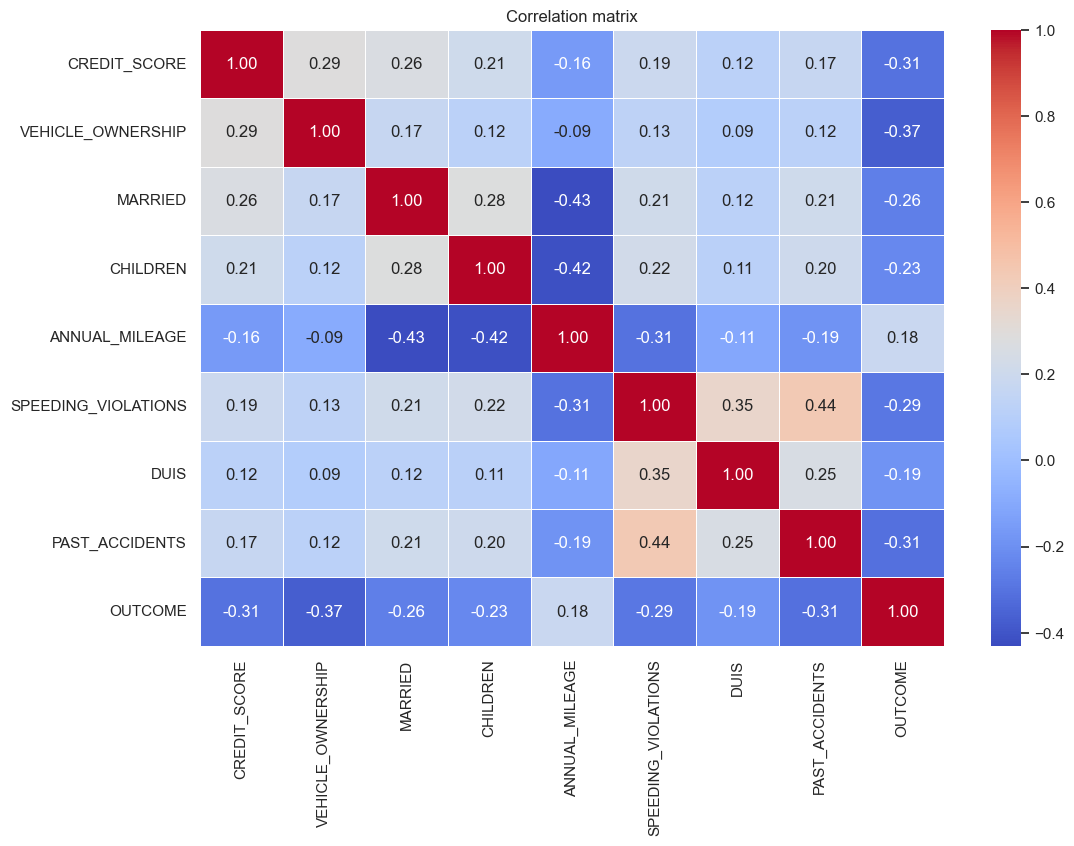

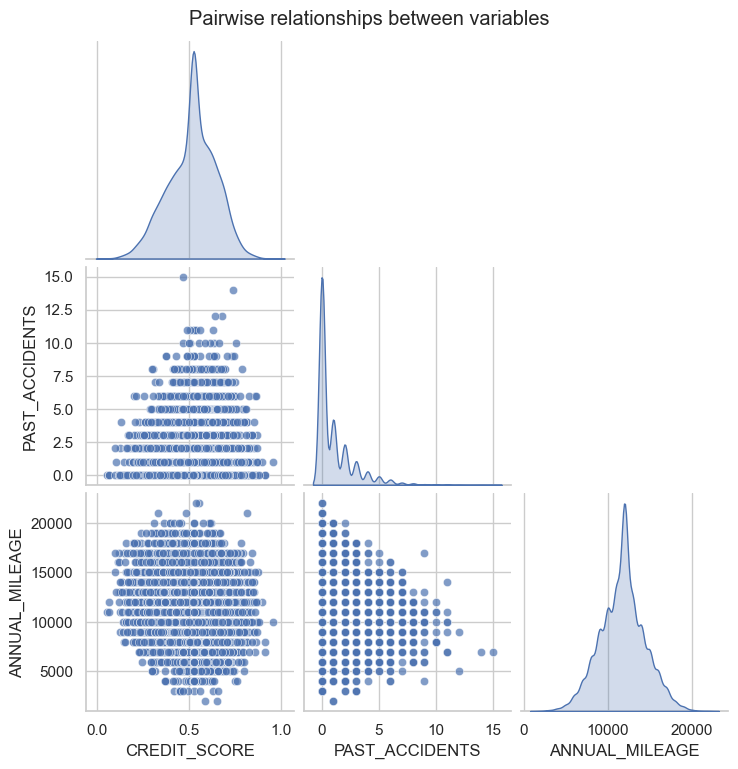

In [503]:
plt.figure(figsize=(12, 8))
correlation_matrix = carIC.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

pairplot_columns = ['CREDIT_SCORE', 'INCOME', 'PAST_ACCIDENTS', 'AGE', 'ANNUAL_MILEAGE']
sns.pairplot(carIC[pairplot_columns], diag_kind="kde", corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise relationships between variables", y=1.02)
plt.show()

# Conclusion

The analysis showed that main factors that affect the application for insurance are **income level, creadit score, speeding violations, DUI, previos accidents.** People with loans are more cautious than people without loans and their own cars. Those who have a car with high mileage are more likely to get into accidents.

Foctors such as education, children, type of car do not affect insurance. Also, not can the insurence company influence this.

I think to increase customers need to:
- Introduce discounts for customers with high credit rating;
- More favorable conditions for drivers without violations;
- Car owners with low mileage should have more bonuses.